# After Class - 8 de Diciembre de 2021
## Tutor: Héctor Schwarz
<br>**Contenido:**<br>
**1-** Presentación de la librería yfinance<br>
**2-** Presentación de la librería pandas-datareader<br>
**3-** Predicciones utilizando Scikit-Learn

In [1]:
# Esto es solo para los que usen Colab
# !pip install --upgrade pandas_datareader
# pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import pandas_datareader.data as web
import datetime

# 1- yfinance
**Instalación para Jupyter:**
    pip install yfinance<br>
**Instalación para Colab:** !pip install yfinance<br>
**Documentación:**
    https://pypi.org/project/yfinance/

In [3]:
BMA_yf = yf.Ticker('BMA.BA')
GGAL_yf = yf.Ticker('GGAL.BA')
BPAT_yf = yf.Ticker('BPAT.BA')
BBAR_yf = yf.Ticker('BBAR.BA')
BRIO_yf = yf.Ticker('BRIO.BA')
empresas = [BMA_yf, GGAL_yf, BPAT_yf, BBAR_yf, BRIO_yf]

In [4]:
BMA_yf.info

{'zip': '1182',
 'sector': 'Financial Services',
 'fullTimeEmployees': 8167,
 'longBusinessSummary': 'Banco Macro S.A. provides various banking products and services to retail and corporate customers in Argentina. It offers various retail banking products and services, such as savings and checking accounts, time deposits, credit and debit cards, consumer finance loans, mortgage loans, automobile loans, overdrafts, credit-related services, home and car insurance coverage, tax collection, utility payments, automated teller machines (ATMs), and money transfers. The company also provides personal loans, document discounts, residential mortgages, overdrafts, pledged loans, and credit card loans to retail customers. In addition, it offers corporate banking products and services, including deposits, lending, check cashing advances and factoring, guaranteed loans, credit lines for financing foreign trade, and cash management services; trust, payroll, and financial agency services, as well as c

In [5]:
def convertir_DataFrame(empresas):
    marketCap_values=[] 
    empleados_values=[]
    cierre_values=[]
    EPS_values=[]
    index_df =[]
    for item in empresas:
        marketCap_values.append(item.info['marketCap'] / 1000000000)
        empleados_values.append( item.info['fullTimeEmployees'])
        cierre_values.append( item.info['previousClose'])
        EPS_values.append( item.info['trailingEps'])
        symbol=item.info['symbol']
        index_df.append(symbol)
    
    data_df = { 'Capitalización de Mercado': marketCap_values,            
                'Cantidad de Empleados': empleados_values,
                'Último Cierre': cierre_values,
                'Ganancias por acción': EPS_values
                 }
    full_df = pd.DataFrame(data=data_df, index=index_df)
    return full_df

In [6]:
empresas_df = convertir_DataFrame(empresas)
empresas_df.head()

,Capitalización de Mercado,Cantidad de Empleados,Último Cierre,Ganancias por acción
BMA.BA,204.192449,8167,318.00,25.483
GGAL.BA,314.108969,8744,208.75,11.758
BPAT.BA,60.408238,3200,81.40,3.867
BBAR.BA,140.727992,5888,235.40,0.199
BRIO.BA,137.641738,7263,30.80,1.324


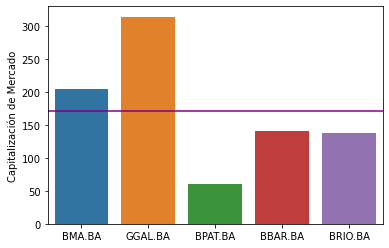

In [7]:
barras = sns.barplot(data=empresas_df, x= empresas_df.index, y=empresas_df['Capitalización de Mercado'])
barras.axhline(empresas_df['Capitalización de Mercado'].mean(), color='purple')
plt.show()

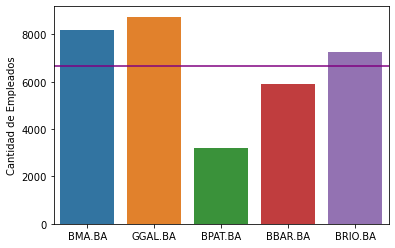

In [8]:
barras = sns.barplot(data=empresas_df, x= empresas_df.index, y=empresas_df['Cantidad de Empleados'])
barras.axhline(empresas_df['Cantidad de Empleados'].mean(), color='purple')
plt.show()

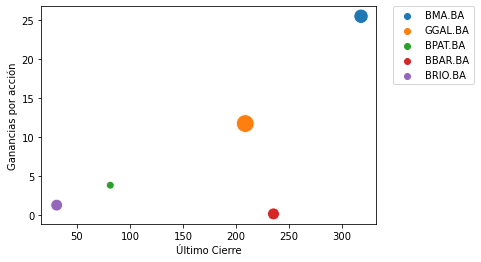

In [9]:
scatter = sns.scatterplot(data=empresas_df, 
                x=empresas_df['Último Cierre'], 
                y= empresas_df['Ganancias por acción'], 
                s = empresas_df['Capitalización de Mercado'],
                hue=empresas_df.index,
                )
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

# 2- pandas-datareader
**Instalación para Jupyter:**
    pip install pandas-datareader<br>
**Instalación para Colab:** !pip install --upgrade pandas_datareader<br>
En caso de no funcionar, volver a ejecutar tras haber reiniciado el entorno de ejecución.
**Documentación:**
    https://pandas-datareader.readthedocs.io/en/latest/

In [10]:
comienzo = datetime.datetime(2020, 1, 1)
final = datetime.datetime(2021, 12, 7)

df = web.DataReader("NFLX", 'yahoo', comienzo, final)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-01,654.520020,617.070007,649.479980,617.770020,3882800,617.770020
2021-12-02,625.359985,612.880005,617.099976,616.469971,3331100,616.469971
2021-12-03,625.500000,594.000000,622.750000,602.130005,4825200,602.130005
2021-12-06,617.289978,601.000000,606.010010,612.690002,3075700,612.690002
2021-12-07,628.890015,611.400024,619.830017,625.580017,3124100,625.580017


<AxesSubplot:xlabel='Date'>

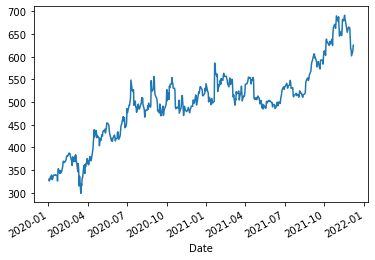

In [11]:
df['Adj Close'].plot()

In [12]:
total_df = web.DataReader(['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG','MSFT'],
                        'yahoo', start = comienzo, end = final )['Adj Close']
total_df.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,,
2020-01-02,209.779999,1898.010010,73.988480,329.809998,1367.369995,157.615112
2020-01-03,208.669998,1874.969971,73.269165,325.899994,1360.660034,155.652527
2020-01-06,212.600006,1902.880005,73.852989,335.829987,1394.209961,156.054886
2020-01-07,213.059998,1906.859985,73.505646,330.750000,1393.339966,154.631973
2020-01-08,215.220001,1891.969971,74.688072,339.260010,1404.319946,157.095016


In [13]:
total_df.tail()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,,
2021-12-01,310.600006,3443.719971,164.770004,617.770020,2832.360107,330.079987
2021-12-02,310.390015,3437.360107,163.759995,616.469971,2875.530029,329.489990
2021-12-03,306.839996,3389.790039,161.839996,602.130005,2850.409912,323.010010
2021-12-06,317.869995,3427.370117,165.320007,612.690002,2875.929932,326.190002
2021-12-07,322.809998,3523.290039,171.179993,625.580017,2960.729980,334.920013


### Calculamos si hay Correlación

In [14]:
correl = total_df.corr()
correl

Symbols,FB,AMZN,AAPL,NFLX,GOOG,MSFT
Symbols,,,,,,
FB,1.000000,0.861298,0.926128,0.785393,0.921612,0.913360
AMZN,0.861298,1.000000,0.917180,0.874416,0.731953,0.816467
AAPL,0.926128,0.917180,1.000000,0.890531,0.886153,0.927061
NFLX,0.785393,0.874416,0.890531,1.000000,0.791666,0.896555
GOOG,0.921612,0.731953,0.886153,0.791666,1.000000,0.967053
MSFT,0.913360,0.816467,0.927061,0.896555,0.967053,1.000000


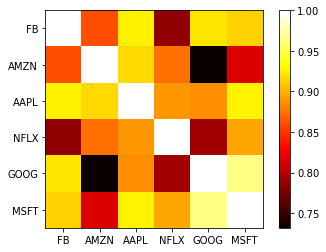

In [15]:
plt.imshow(correl, cmap='hot', interpolation='None') #probar interpolation = 'quadric'
plt.colorbar()
plt.xticks(range(len(correl)), correl.columns)
plt.yticks(range(len(correl)), correl.columns);
plt.show()

### Data Readers Disponibles
<br> Banco Mundial
<br> Reserva Federal de EE.UU.
<br> OCDE
<br>https://pandas-datareader.readthedocs.io/en/latest/readers/index.html


# 3- Scikit-Learn

In [16]:
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import matplotlib as mpl
from matplotlib import style

In [17]:
#pd.options.display.width = 0
# Vamos a trabajar con Datos de Netflix (NFLX).
# Por si quieren probar con otros datos, también subí archivos de Disney (DIS) y Bitcoin (BTC-USD)
NFLX_df = pd.read_csv('NFLX.csv')
print(NFLX_df.head())

close_px = NFLX_df['Adj Close']

# Preparo un DataFrame con menos datos
shorter_df = NFLX_df.loc[:,['Adj Close','Volume']]


         Date        Open        High         Low       Close   Adj Close  \
0  2018-12-03  293.190002  298.720001  284.579987  290.299988  290.299988   
1  2018-12-04  288.130005  295.739990  274.720001  275.329987  275.329987   
2  2018-12-06  268.329987  283.220001  267.140015  282.880005  282.880005   
3  2018-12-07  282.480011  284.209991  263.380005  265.140015  265.140015   
4  2018-12-10  264.190002  271.179993  260.609985  269.700012  269.700012   

     Volume  
0  14117400  
1  12800600  
2  13074300  
3  12466700  
4   9605600  


In [18]:
shorter_df.head()

,Adj Close,Volume
0,290.299988,14117400
1,275.329987,12800600
2,282.880005,13074300
3,265.140015,12466700
4,269.700012,9605600


In [19]:
# Chequear si hay algún Nan
shorter_df.isnull().values.any()

False

In [20]:
# Nos deshacemos de los Nan
#shorter_df.fillna(value=-99999, inplace=True)

In [21]:
# Calculo cuánto es el 1%, respecto de los datos para predecir
separados_1p = int(math.ceil(0.01 * len(shorter_df)))

# Separamos el "precio de cierre ajustado"
forecast_col = 'Adj Close'
shorter_df['label'] = shorter_df[forecast_col].shift(-separados_1p)
X = np.array(shorter_df.drop(['label'], 1))

# Hacemos un preprocesamiento de X, para que tengan la misma distribución para Regresión Lineal
X = preprocessing.scale(X)

# Preparamos X para la generación y evaluación del modelo
X_lately = X[-separados_1p:]
X = X[:-separados_1p]

# Separamos a label y lo identificamos como y
y = np.array(shorter_df['label'])
y = y[:-separados_1p]

In [22]:
# Separamos los datos para Train y test, en un 80% - 20%
train, test = train_test_split(NFLX_df, test_size=0.20)

# Hacemos un Reshape a X_train 
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']

# Regresión Lineal
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Regresión Cuadrática
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# KNN 
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']

# Generamos un array de Y con los valores que se predicen
y_pred_reg = clfreg.predict(X_test)
y_pred_poly2 = clfpoly2.predict(X_test)
y_pred_knn = clfknn.predict(X_test)


### Predicción mediante Regresión Lineal

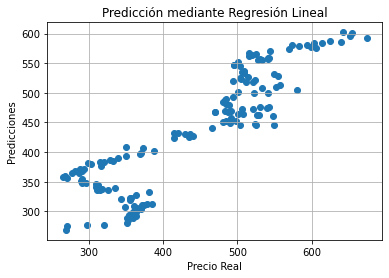

In [23]:
plt.scatter(y_test, y_pred_reg)

plt.xlabel('Precio Real')
plt.ylabel('Predicciones')

plt.title('Predicción mediante Regresión Lineal')
plt.grid()
plt.show()

### Predicción mediante Regresión Cuadrática

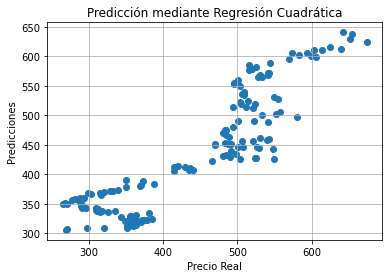

In [24]:
plt.scatter(y_test, y_pred_poly2)
plt.grid()
plt.xlabel('Precio Real')
plt.ylabel('Predicciones')

plt.title('Predicción mediante Regresión Cuadrática')

plt.show()

### Predicción mediante KNN

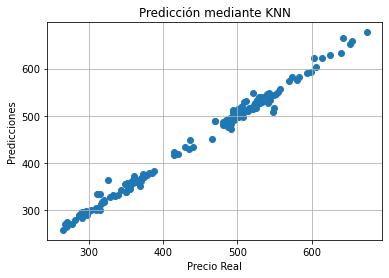

In [25]:
plt.scatter(y_test, y_pred_knn)
plt.grid()
plt.xlabel('Precio Real')
plt.ylabel('Predicciones')

plt.title('Predicción mediante KNN')

plt.show()

# Muchas gracias!